In [1]:
import scipy as scp
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

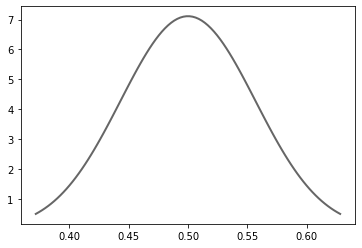

In [2]:
# playing with beta function parameters
fig, ax = plt.subplots(1, 1)
a, b = 40, 40
mean, var, skew, kurt = sps.beta.stats(a, b, moments='mvsk')
x = np.linspace(scp.stats.beta.ppf(0.01, a, b), scp.stats.beta.ppf(0.99, a, b), 100)
ax.plot(x, scp.stats.beta.pdf(x, a, b), 'k-', lw=2, alpha=0.6, label='beta pdf')

In [6]:
beta_a = 40
beta_b = 40

observed_trials = 188
observed_wins = 106
observed_losses = observed_trials - observed_wins

p_range = np.linspace(0,1,1001)
my_df = pd.DataFrame(data=None,columns=['p','Pr(data|p)','Pr(p)','Pr(p|data)'], index=p_range)
my_df['p'] = p_range
my_df['Pr(data|p)'] = scp.special.comb(observed_trials, observed_wins) * my_df['p']**observed_wins * (1-my_df['p'])**observed_losses
my_df['Pr(p)'] = scp.stats.beta(beta_a, beta_b).pdf(my_df['p'])

Pr_data = scp.integrate.trapz(my_df['Pr(data|p)'] * my_df['Pr(p)'], my_df['p'])

my_df['Pr(p|data)'] = my_df['Pr(data|p)'] * my_df['Pr(p)'] / Pr_data

my_df.head()

,p,Pr(data|p),Pr(p),Pr(p|data)
0.000,0.000,0.000000e+00,0.000000e+00,0.000000e+00
0.001,0.001,4.557497e-264,2.067862e-93,0.000000e+00
0.002,0.002,3.405970e-232,1.093273e-81,1.839259e-311
0.003,0.003,1.452824e-213,7.750107e-75,5.561528e-286
0.004,0.004,2.344130e-200,5.558037e-70,6.435417e-268


Text(0, 0.5, 'Pr(p|data)')

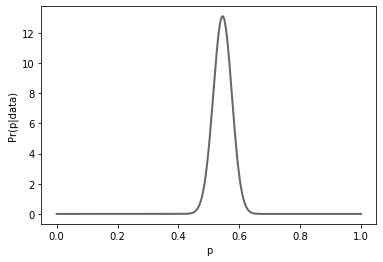

In [7]:
fig, ax = plt.subplots(1, 1)
ax.plot(my_df['p'], my_df['Pr(p|data)'], 'k-', lw=2, alpha=0.6, label='beta pdf')
plt.xlabel('p')
plt.ylabel('Pr(p|data)')